# **Clustering_dbscan**

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

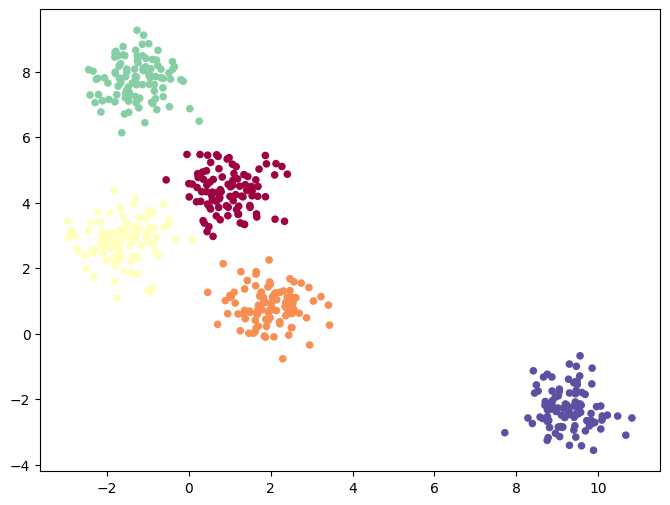

In [332]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])


plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20) 

In [333]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [334]:
from sklearn.metrics import silhouette_score, silhouette_samples

n_range = range(2,10)

def best_n_clusters(X, linkage_type):
    silhouette_avg_scores = []
    
    for k in n_range:
        agg_clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage_type)
        labels = agg_clustering.fit_predict(X)
        score = silhouette_score(X, labels) 
        silhouette_avg_scores.append(score)

    best_n = n_range[np.argmax(silhouette_avg_scores)]
    print("best n: ", best_n)
    return best_n

best n:  5


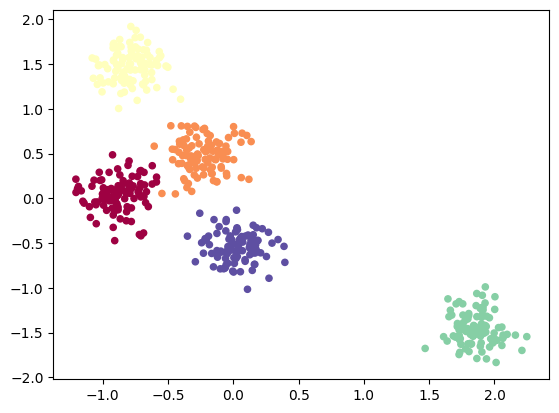

In [335]:
# "Complete" agglomerative clustering
best_n_comp = best_n_clusters(X_scaled, "complete")
clf_comp = AgglomerativeClustering(n_clusters=best_n_comp, linkage="complete")

predicted_comp = clf_comp.fit_predict(X_scaled)
sample_silhouette_values = silhouette_samples(X_scaled, predicted_comp)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c= colors[predicted_comp], s= 20) 

best n:  2


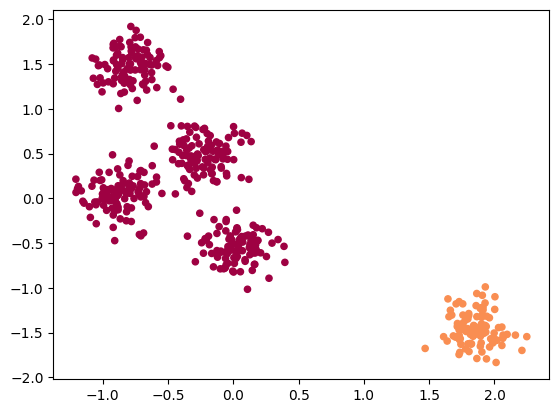

In [336]:
#"Single" agglomerative clustering
best_n_single = best_n_clusters(X_scaled, "single")
clf_comp = AgglomerativeClustering(n_clusters=best_n_single, linkage="single")

predicted_single = clf_comp.fit_predict(X_scaled)
sample_silhouette_values = silhouette_samples(X_scaled, predicted_single)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c= colors[predicted_single], s= 20) 

In [337]:
from sklearn.cluster import DBSCAN

def apply_db_scan(X, eps):
    dbscan = DBSCAN(eps=eps, min_samples=2, ).fit(X)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))-1
    print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted == -1)] = n_clusters_and_noice
    return predicted 

n_clusters_and_noice =9

n_clusters_and_noice =2

n_clusters_and_noice =1

n_clusters_and_noice =0



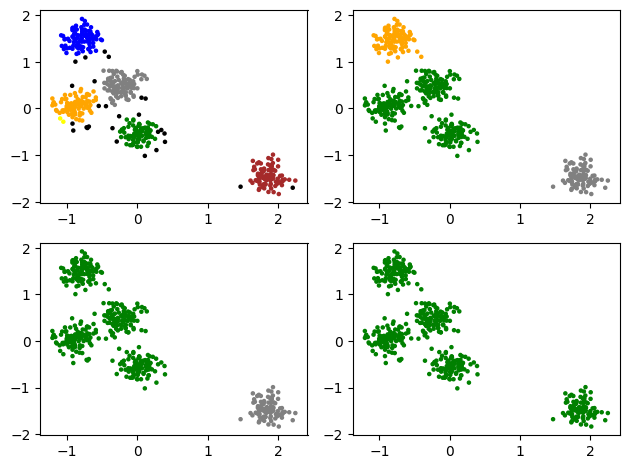

In [338]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axes = (ax1, ax2, ax3, ax4)
 
for i, eps in enumerate([0.1, 0.26, 0.3, 1.4]):    
    predicted  =  apply_db_scan(X_scaled, eps=eps)
    colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
    colors= np.r_[colors, np.array(['black']*100)]  
    axes[i].scatter(X_scaled[:,0], X_scaled[:,1], c= colors[predicted], s= 5)

plt.tight_layout() 

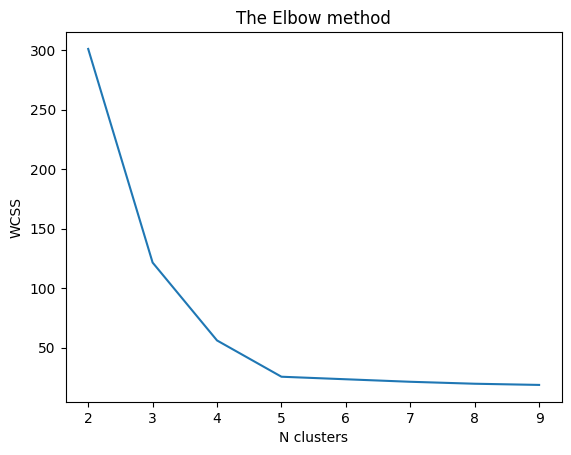

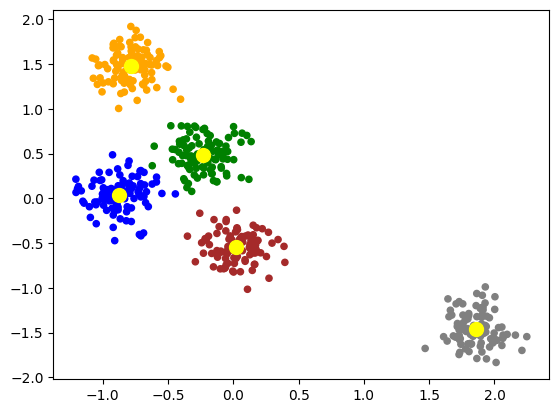

In [339]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(2,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 

plt.plot(k_range, wcss)
plt.title("The Elbow method")
plt.xlabel("N clusters")
plt.ylabel("WCSS")
plt.show()

kmeans_opt = KMeans(n_clusters=5, random_state=42)

y_pred = kmeans_opt.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c= colors[y_pred], s= 20) 
plt.scatter(kmeans_opt.cluster_centers_[:, 0], kmeans_opt.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()